In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

import cartopy.crs as ccrs
#import cartopy.feature as cfeat
#import cartopy.io.img_tiles as cimgt
from sklearn.neighbors import KNeighborsRegressor
#import AISMapPlot as aismap
import pickle

In [2]:
sectors = [0, 1, 2, 3, 4, 5]
sector_borders = [52.8, 4.8, 6.0, 7.2, 8.6, 9.81]
positions = pd.DataFrame([[52.8, np.nan], [np.nan, 4.8], [np.nan, 6.0], [np.nan, 7.2], [np.nan, 8.6], [np.nan, 9.81]],
                         columns = ['Latitude', 'Longitude'])

    
ais_test = []  
for s in sectors:
    ais_test.append(pd.read_pickle('ROT-HAM_test_01min_s%d.pkl' % (s)))

In [3]:
# load the different learners for all agents

time_loaded = []
pos_loaded = []
cog_loaded = []
sog_loaded = []

for s in sectors:
    cog_loaded.append(pickle.load(open('../App/Agents/rot_ham_s%d/model_cog.pkl' % (s), 'rb')))
    pos_loaded.append(pickle.load(open('../App/Agents/rot_ham_s%d/model_position.pkl' % (s), 'rb')))    
    sog_loaded.append(pickle.load(open('../App/Agents/rot_ham_s%d/model_sog.pkl' % (s), 'rb')))
    time_loaded.append(pickle.load(open('../App/Agents/rot_ham_s%d/model_time.pkl' % (s), 'rb')))

In [8]:
# create values for the predicted future position, cog and soc

ais_test[0]['0seclon']= pos_loaded[0].predict(ais_test[0][['Latitude','Longitude', 'SOG', 'COG']])
ais_test[0]['0seclat']= sector_borders[0]
ais_test[0]['0secsog']= sog_loaded[0].predict(ais_test[0][['Latitude','Longitude', 'SOG', 'COG']])
ais_test[0]['0seccog']= cog_loaded[0].predict(ais_test[0][['Latitude','Longitude', 'SOG', 'COG']])

ais_test[0]['1seclat']= pos_loaded[1].predict(ais_test[0][['0seclat','0seclon', '0secsog', '0seccog']])
ais_test[0]['1seclon']= sector_borders[1]
ais_test[0]['1secsog']= sog_loaded[1].predict(ais_test[0][['0seclat','0seclon', '0secsog', '0seccog']])
ais_test[0]['1seccog']= cog_loaded[1].predict(ais_test[0][['0seclat','0seclon', '0secsog', '0seccog']])

ais_test[0]['2seclat']= pos_loaded[2].predict(ais_test[0][['1seclat','1seclon', '1secsog', '1seccog']])
ais_test[0]['2seclon']= sector_borders[2]
ais_test[0]['2secsog']= sog_loaded[2].predict(ais_test[0][['1seclat','1seclon', '1secsog', '1seccog']])
ais_test[0]['2seccog']= cog_loaded[2].predict(ais_test[0][['1seclat','1seclon', '1secsog', '1seccog']])

ais_test[0]['3seclat']= pos_loaded[3].predict(ais_test[0][['2seclat','2seclon', '2secsog', '2seccog']])
ais_test[0]['3seclon']= sector_borders[3]
ais_test[0]['3secsog']= sog_loaded[3].predict(ais_test[0][['2seclat','2seclon', '2secsog', '2seccog']])
ais_test[0]['3seccog']= cog_loaded[3].predict(ais_test[0][['2seclat','2seclon', '2secsog', '2seccog']])

ais_test[0]['4seclat']= pos_loaded[4].predict(ais_test[0][['3seclat','3seclon', '3secsog', '3seccog']])
ais_test[0]['4seclon']= sector_borders[4]
ais_test[0]['4secsog']= sog_loaded[4].predict(ais_test[0][['3seclat','3seclon', '3secsog', '3seccog']])
ais_test[0]['4seccog']= cog_loaded[4].predict(ais_test[0][['3seclat','3seclon', '3secsog', '3seccog']])



ais_test[1]['1seclat']= pos_loaded[1].predict(ais_test[1][['Latitude','Longitude', 'SOG', 'COG']])
ais_test[1]['1seclon']= sector_borders[1]
ais_test[1]['1secsog']= sog_loaded[1].predict(ais_test[1][['Latitude','Longitude', 'SOG', 'COG']])
ais_test[1]['1seccog']= cog_loaded[1].predict(ais_test[1][['Latitude','Longitude', 'SOG', 'COG']])

ais_test[1]['2seclat']= pos_loaded[2].predict(ais_test[1][['1seclat','1seclon', '1secsog', '1seccog']])
ais_test[1]['2seclon']= sector_borders[2]
ais_test[1]['2secsog']= sog_loaded[2].predict(ais_test[1][['1seclat','1seclon', '1secsog', '1seccog']])
ais_test[1]['2seccog']= cog_loaded[2].predict(ais_test[1][['1seclat','1seclon', '1secsog', '1seccog']])

ais_test[1]['3seclat']= pos_loaded[3].predict(ais_test[1][['2seclat','2seclon', '2secsog', '2seccog']])
ais_test[1]['3seclon']= sector_borders[3]
ais_test[1]['3secsog']= sog_loaded[3].predict(ais_test[1][['2seclat','2seclon', '2secsog', '2seccog']])
ais_test[1]['3seccog']= cog_loaded[3].predict(ais_test[1][['2seclat','2seclon', '2secsog', '2seccog']])

ais_test[1]['4seclat']= pos_loaded[4].predict(ais_test[1][['3seclat','3seclon', '3secsog', '3seccog']])
ais_test[1]['4seclon']= sector_borders[4]
ais_test[1]['4secsog']= sog_loaded[4].predict(ais_test[1][['3seclat','3seclon', '3secsog', '3seccog']])
ais_test[1]['4seccog']= cog_loaded[4].predict(ais_test[1][['3seclat','3seclon', '3secsog', '3seccog']])



ais_test[2]['2seclat']= pos_loaded[2].predict(ais_test[2][['Latitude','Longitude', 'SOG', 'COG']])
ais_test[2]['2seclon']= sector_borders[2]
ais_test[2]['2secsog']= sog_loaded[2].predict(ais_test[2][['Latitude','Longitude', 'SOG', 'COG']])
ais_test[2]['2seccog']= cog_loaded[2].predict(ais_test[2][['Latitude','Longitude', 'SOG', 'COG']])

ais_test[2]['3seclat']= pos_loaded[3].predict(ais_test[2][['2seclat','2seclon', '2secsog', '2seccog']])
ais_test[2]['3seclon']= sector_borders[3]
ais_test[2]['3secsog']= sog_loaded[3].predict(ais_test[2][['2seclat','2seclon', '2secsog', '2seccog']])
ais_test[2]['3seccog']= cog_loaded[3].predict(ais_test[2][['2seclat','2seclon', '2secsog', '2seccog']])

ais_test[2]['4seclat']= pos_loaded[4].predict(ais_test[2][['3seclat','3seclon', '3secsog', '3seccog']])
ais_test[2]['4seclon']= sector_borders[4]
ais_test[2]['4secsog']= sog_loaded[4].predict(ais_test[2][['3seclat','3seclon', '3secsog', '3seccog']])
ais_test[2]['4seccog']= cog_loaded[4].predict(ais_test[2][['3seclat','3seclon', '3secsog', '3seccog']])



ais_test[3]['3seclat']= pos_loaded[3].predict(ais_test[3][['Latitude','Longitude', 'SOG', 'COG']])
ais_test[3]['3seclon']= sector_borders[3]
ais_test[3]['3secsog']= sog_loaded[3].predict(ais_test[3][['Latitude','Longitude', 'SOG', 'COG']])
ais_test[3]['3seccog']= cog_loaded[3].predict(ais_test[3][['Latitude','Longitude', 'SOG', 'COG']])

ais_test[3]['4seclat']= pos_loaded[4].predict(ais_test[3][['3seclat','3seclon', '3secsog', '3seccog']])
ais_test[3]['4seclon']= sector_borders[4]
ais_test[3]['4secsog']= sog_loaded[4].predict(ais_test[3][['3seclat','3seclon', '3secsog', '3seccog']])
ais_test[3]['4seccog']= cog_loaded[4].predict(ais_test[3][['3seclat','3seclon', '3secsog', '3seccog']])



ais_test[4]['4seclat']= pos_loaded[4].predict(ais_test[4][['Latitude','Longitude', 'SOG', 'COG']])
ais_test[4]['4seclon']= sector_borders[4]
ais_test[4]['4secsog']= sog_loaded[4].predict(ais_test[4][['Latitude','Longitude', 'SOG', 'COG']])
ais_test[4]['4seccog']= cog_loaded[4].predict(ais_test[4][['Latitude','Longitude', 'SOG', 'COG']])


In [12]:
# calculte the predicted remaining minutes

ais_test[0]['mins'] = (time_loaded[0].predict(ais_test[0][['Latitude','Longitude','COG','SOG']])) + (time_loaded[1].predict(ais_test[0][['0seclat', '0seclon', '0seccog', '0secsog']])) + (time_loaded[2].predict(ais_test[0][['1seclat','1seclon','1seccog','1secsog']])) + (time_loaded[3].predict(ais_test[0][['2seclat','2seclon','2seccog','2secsog']])) + (time_loaded[4].predict(ais_test[0][['3seclat','3seclon','3seccog','3secsog']])) + (time_loaded[5].predict(ais_test[0][['4seclat','4seclon','4seccog','4secsog']])) 
ais_test[1]['mins'] = (time_loaded[1].predict(ais_test[1][['Latitude','Longitude','COG','SOG']])) + (time_loaded[2].predict(ais_test[1][['1seclat', '1seclon', '1seccog', '1secsog']])) + (time_loaded[3].predict(ais_test[1][['2seclat','2seclon','2seccog','2secsog']])) + (time_loaded[4].predict(ais_test[1][['3seclat','3seclon','3seccog','3secsog']])) + (time_loaded[5].predict(ais_test[1][['4seclat','4seclon','4seccog','4secsog']])) 
ais_test[2]['mins'] = (time_loaded[2].predict(ais_test[2][['Latitude','Longitude','COG','SOG']])) + (time_loaded[3].predict(ais_test[2][['2seclat', '2seclon', '2seccog', '2secsog']])) + (time_loaded[4].predict(ais_test[2][['3seclat','3seclon','3seccog','3secsog']])) + (time_loaded[5].predict(ais_test[2][['4seclat','4seclon','4seccog','4secsog']]))
ais_test[3]['mins'] = (time_loaded[3].predict(ais_test[3][['Latitude','Longitude','COG','SOG']])) + (time_loaded[4].predict(ais_test[3][['3seclat', '3seclon', '3seccog', '3secsog']])) + (time_loaded[5].predict(ais_test[3][['4seclat','4seclon','4seccog','4secsog']])) 
ais_test[4]['mins'] = (time_loaded[4].predict(ais_test[4][['Latitude','Longitude','COG','SOG']])) + (time_loaded[5].predict(ais_test[4][['4seclat', '4seclon', '4seccog', '4secsog']]))
ais_test[5]['mins'] = (time_loaded[5].predict(ais_test[5][['Latitude','Longitude','COG','SOG']]))

In [19]:
predicts = pd.concat([ais_test[0]['mins'],ais_test[1]['mins'],ais_test[2]['mins'],ais_test[3]['mins'],ais_test[4]['mins'],ais_test[5]['mins']])
end = pd.concat([ais_test[0]['remainingMins'], ais_test[1]['remainingMins'],ais_test[2]['remainingMins'],ais_test[3]['remainingMins'],ais_test[4]['remainingMins'],ais_test[5]['remainingMins']])

In [20]:
diff = predicts-end

In [21]:
predicts_frame = (pd.DataFrame({'correct': end, 'predicted': predicts, 'diff': diff}))
predicts_frame['abs_error'] = predicts_frame['diff'].transform(lambda x: abs(x))
predicts_frame = predicts_frame.sort_values('correct')

In [22]:
predicts_frame['abs_error'].describe()

count    1346.000000
mean      130.027249
std        94.839046
min         0.009384
25%        38.275628
50%       112.439767
75%       223.112908
max       302.142063
Name: abs_error, dtype: float64

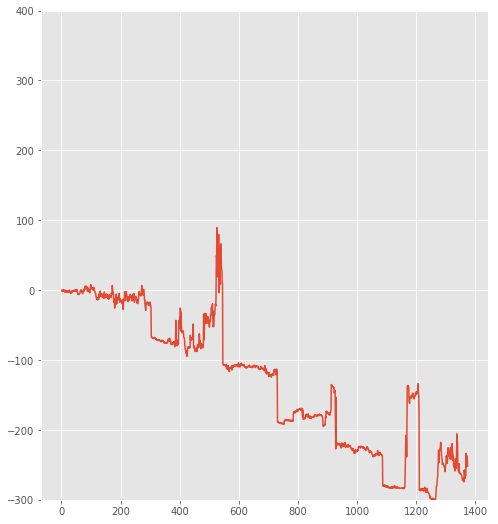

In [23]:
plt.figure(figsize = (8, 9))
axes = plt.gca()
axes.set_ylim([-300,400])
plt.plot(predicts_frame['correct'], predicts_frame['diff'])
# plt.savefig('../Images/rot_ham_sectors_mixed.png', dpi = 300, bbox_inches = 'tight')